In [6]:
# Dependencies
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [43]:
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

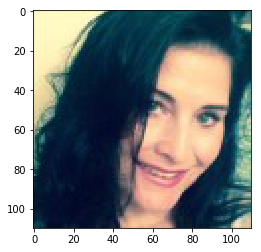

In [29]:
strImgPath0 = '../ek_scrape/img/doctordata/MyCity08mi/HappyAustinGal.00.png'
img0 = pyplot.imread(strImgPath0, format='jpg')
pyplot.imshow(img0)

In [32]:
# Preprocess images for model prediction
# This step handles scaling and normalization
lstX0 = image.img_to_array(img0)
lstX0 = np.expand_dims(lstX0, axis=0)

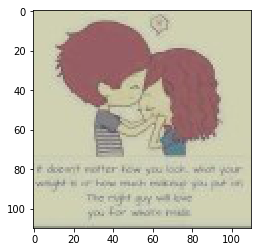

In [31]:
strImgPath1 = '../ek_scrape/img/doctordata/MyCity08mi/kbriginatx.02.png'
img1 = pyplot.imread(strImgPath1, format='jpg')
pyplot.imshow(img1)

In [33]:
# Preprocess images for model prediction
# This step handles scaling and normalization
lstX1 = image.img_to_array(img1)
lstX1 = np.expand_dims(lstX1, axis=0)

In [ ]:
lstTrainX, lstTestX, lstTrainY, lstTestY = train_test_split(lstX, lstY, random_state=17, stratify=lstY)

In [44]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [45]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 12,402
Trainable params: 12,402
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(
    lstX,
    [1, 0],
    epochs=60,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking input: expected dense_input to have 2 dimensions, but got array with shape (1, 110, 110, 3)

In [ ]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")